# 一个回归的练习

In [1]:
# Import libs
import numpy

import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.1.0-dev20191009


In [2]:
# 定义数据生成公式，一个二次方程+随机误差
def data_function(x):
    return tf.map_fn(lambda e: e * e  + 5 * e + numpy.random.uniform(-20, 20), x)

<Figure size 432x288 with 0 Axes>

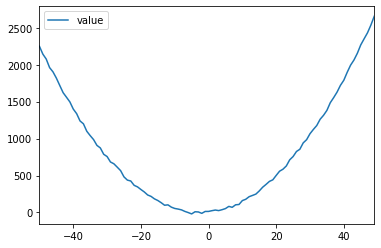

In [4]:
rangex = tf.range(-50, 50, 1, dtype=tf.dtypes.float32)
rangey = data_function(rangex)

# 可视化数据
df = pd.DataFrame({'value': rangey}, index=rangex)
plt.figure()
df.plot()

In [5]:
# 构建模型
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [6]:
model = build_model()

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 训练
train_data = tf.random.uniform([5000, 1], -50, 50)
train_result = data_function(train_data)

In [9]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 100

history = model.fit(
  train_data, train_result,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................

In [10]:
# 查看训练结果
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,348.464260,13.927857,348.464264,294.223912,13.801828,294.223938,95
96,337.926664,13.966034,337.926636,208.134374,11.804204,208.134338,96
97,348.345591,14.108187,348.345581,402.966672,16.114189,402.966675,97
98,343.508723,14.054710,343.508728,710.280544,19.448891,710.280457,98
99,354.486633,14.083768,354.486725,317.003868,14.223672,317.003906,99


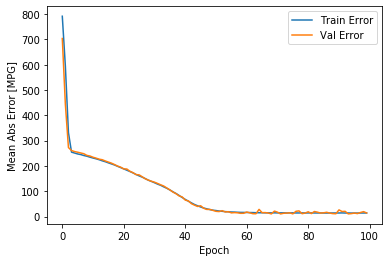

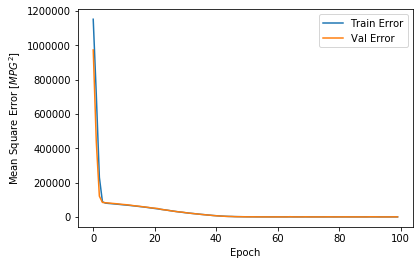

In [11]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
#   plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
#   plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

In [12]:
# 和真实情况对比
# 可以发现在训练区间时，预测准确，但是当超出训练区间后预测就出现了偏差
rangex = tf.range(-150, 150, 1, dtype=tf.dtypes.float32)
test_predictions = model.predict(tf.reshape(rangex, [300, 1])).flatten()

<Figure size 432x288 with 0 Axes>

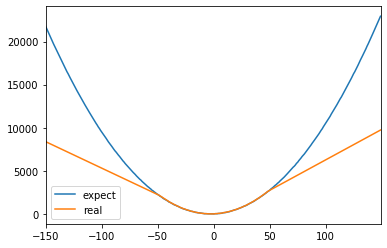

In [13]:
df = pd.DataFrame({'expect': data_function(rangex), 'real':test_predictions}, index=rangex)
plt.figure()
df.plot()